# WALMART SALES FORECASTING

Notebook dedicado al análisis estadístico de los datos utilizando PYTHON

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


## Importación de librerias

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


## Carga del DATASET

In [2]:
df = pd.read_csv(r'C:\Users\Frode\Documents\Cursos\Skillstech\WALMARTSALESFORECASTING\Dataset\Walmart_Store_sales.csv', encoding = 'utf-8')

Asignación de días festivos a variables

In [3]:
#Holiday Events
Super_Bowl =  ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-09-2010', '09-09-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

## Consulta de los datos

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,9/28/2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,10/19/2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
#Cantidad de filas y columnas
df.shape

(6435, 8)

In [6]:
#Información relevante del dataset
df.info

<bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1    5/2/2010    1643690.90             0        42.31       2.572   
1         1   12/2/2010    1641957.44             1        38.51       2.548   
2         1   2/19/2010    1611968.17             0        39.93       2.514   
3         1   2/26/2010    1409727.59             0        46.63       2.561   
4         1    5/3/2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45   9/28/2012     713173.95             0        64.88       3.997   
6431     45   5/10/2012     733455.07             0        64.89       3.985   
6432     45  12/10/2012     734464.36             0        54.47       4.000   
6433     45  10/19/2012     718125.53             0        56.47       3.969   
6434     45  10/26/2012     760281.43             0        58.85       3.882   

       

In [7]:
#Consulta de los tipos de datos presentes en el DATASET
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

## Preprocesamiento de los datos

In [8]:
#Corrección del tipo de dato de la columna "Date"
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [10]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


## Análisis de los datos

In [11]:
#Conteo de Ventas semanales registradas por tienda
df.groupby('Store').count()['Weekly_Sales']

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Weekly_Sales, dtype: int64

In [12]:
#Conteo de datos nulos
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
#Conteo de ventas semanales negativas
df.loc[df['Weekly_Sales'] < 0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


### Insights considerados útiles para Walmart.

#### Tienda con la mayor cantidad de ventas registradas

In [14]:
total_sales = df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending = False)
total_sales.head(1)

Store
20    301397792.0
Name: Weekly_Sales, dtype: float64

#### Tienda con la menor cantidad de ventas registradas

In [15]:
total_sales.tail(1)

Store
33    37160222.0
Name: Weekly_Sales, dtype: float64

#### Tienda con la máxima desviación estándar

In [16]:
df_std = df.groupby('Store')['Weekly_Sales'].std().round(3).sort_values(ascending=False)
df_std.head()

Store
14    317569.949
10    302262.063
20    275900.563
4     266201.442
13    265506.996
Name: Weekly_Sales, dtype: float64

#### Desviacion estandar del total de las ventas semanales

In [17]:
df_std_total = df['Weekly_Sales'].std().round(3)
df_std_total

564366.622

#### Cálculo del coeficiente medio de la desviación estándar de la tienda nro 14

In [18]:
#Cálculo del coeficiente medio de la desviación estándar de la tienda nro 14 para evaluar que tan dispersos estan los valores de las ventas semanales respecto a la media 
store14  = df[df.Store == 14].Weekly_Sales
mean_to_stddev = store14.std()/store14.mean()*100
mean_to_stddev.round(2)

15.71

#### Cálculo del coeficiente medio de la desviación estándar

In [19]:
#Cálculo del coeficiente medio de la desviación estándar del total de las ventas para evaluar la dispersión se sus valores respecto a la media
coef_total = df_std_total/df['Weekly_Sales'].mean()
coef_total.round(2)

0.54

#### ¿Que tienda tuvo un buen credimiento en el tercer trimestre del año 2012?

In [20]:
q2_sales = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()
q3_sales = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [21]:
pd.DataFrame({'Q2 Sales' :q2_sales,
              'Q3 Sales' :q3_sales,
            'Difference' :(q3_sales-q2_sales),
            'Growth Rate' :(q3_sales-q2_sales)/q3_sales*100}).sort_values(by=['Growth Rate'], ascending=True).head()

,Q2 Sales,Q3 Sales,Difference,Growth Rate
Store,,,,
14,24427769.0,20140430.0,-4287339.0,-21.287227
45,10278900.0,8851242.0,-1427658.0,-16.129465
29,7034493.0,6127862.0,-906631.0,-14.795225
36,4090379.0,3578124.0,-512255.0,-14.316301
5,4427262.0,3880622.0,-546640.0,-14.086402


In [22]:
#Evaluando de una manera más resumida la tienda que tuvo mayor crecimiento en el tercer trimestre del 2012
q2_sales2 = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')]['Weekly_Sales'].sum().round()
q3_sales2 = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')]['Weekly_Sales'].sum().round()

In [23]:
pd.DataFrame([{'Q2 Sales': q2_sales2,
              'Q3 Sales': q3_sales2,
              'Difference': (q3_sales2 - q2_sales2),
              'Growth Rate': (q3_sales2-q2_sales2)/q3_sales2*100}]).T.round()

,0
Q2 Sales,617214097.0
Q3 Sales,555995016.0
Difference,-61219081.0
Growth Rate,-11.0


#### ¿Que días festivos presentan un impacto negativo en las ventas?

In [24]:
Super_Bowl_sales = df[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round(2)
Labour_Day_sales = df[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round(2)
Thanksgiving_sales = df[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
Christmas_sales = df[df.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)

In [25]:
Christmas_sales = df[df.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)
Christmas_sales

960833.11

In [26]:
#mean sales on non holidays
non_holiday_sales = df[(df['Holiday_Flag'] == 0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

#### Análisis del día festivo que presenta mayor suma de ventas que en días no festivos en todas las tiendas.

In [27]:
holidays_sales = pd.DataFrame ([{'Super Bowl' : Super_Bowl_sales,
               'Labour Day' : Labour_Day_sales, 
               'Thanksgiving' : Thanksgiving_sales, 
               'Christmas' : Christmas_sales,
               'Non Holiday Sales': non_holiday_sales}]).T
holidays_sales.sort_values(by=0, ascending=False, inplace=True)
holidays_sales

,0
Thanksgiving,1471273.43
Super Bowl,1079127.99
Labour Day,1042427.29
Non Holiday Sales,1041256.38
Christmas,960833.11


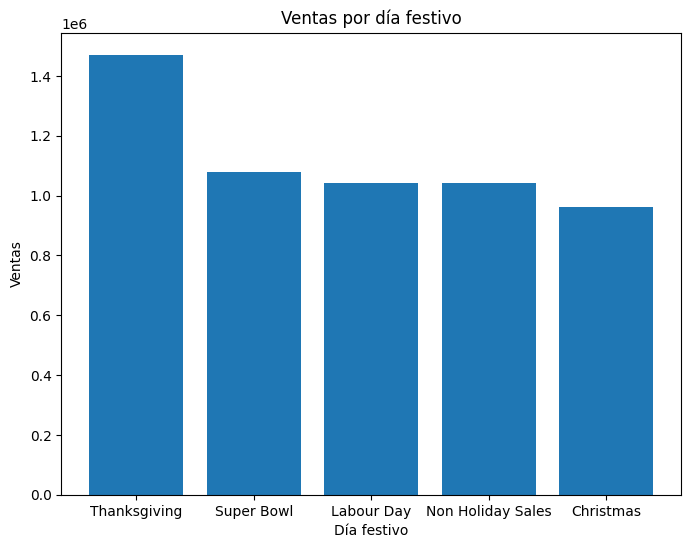

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(holidays_sales.index, holidays_sales[0])
plt.title('Ventas por día festivo')
plt.xlabel('Día festivo')
plt.ylabel('Ventas')
plt.show()